In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("hero.csv", sep = ",", encoding = "UTF-8")
df.head(5)

,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
0,鬥士,175,0,0.0,0,90,580.0,3.0,345,60.0,38.0,32.1
1,法師,550,418,0.8,25,92,526.0,6.5,330,53.0,20.9,30.0
2,刺客,125,200,0.0,0,95,575.0,8.0,345,62.4,23.0,37.0
3,坦克,125,350,0.8,40,106,573.4,8.5,330,61.1,44.0,32.1
4,坦克,125,287,0.5,40,84,613.1,9.0,335,53.4,33.0,32.1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   類型      147 non-null    object 
 1   攻擊距離    147 non-null    int64  
 2   魔力      147 non-null    int64  
 3   魔力回復    147 non-null    float64
 4   魔力提升    147 non-null    int64  
 5   生命提升    147 non-null    int64  
 6   生命      147 non-null    float64
 7   生命回復    147 non-null    float64
 8   移動速度    147 non-null    int64  
 9   物理攻擊    147 non-null    float64
 10  物理防禦    147 non-null    float64
 11  魔法防禦    147 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 13.9+ KB


# 1. EDA

In [84]:
df.describe().round(2).reset_index(level=0)

,index,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
0,count,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00
1,mean,326.39,309.66,0.57,33.03,88.52,555.83,6.60,336.31,59.37,30.06,31.13
2,std,196.52,115.40,0.28,16.62,6.65,37.33,1.78,7.56,6.17,6.72,1.71
3,min,125.00,0.00,0.00,0.00,65.00,340.00,2.50,315.00,40.40,17.00,25.00
4,25%,125.00,278.50,0.40,25.00,85.00,532.40,5.50,330.00,55.00,24.50,30.00
5,50%,175.00,325.00,0.60,38.00,89.00,562.00,7.00,335.00,60.00,30.00,32.00
6,75%,525.00,376.00,0.80,43.50,92.00,582.10,8.00,340.00,64.00,35.00,32.10
7,max,650.00,500.00,1.00,67.00,112.00,625.60,10.00,355.00,70.00,47.00,39.00


In [85]:
print('各類英雄人數')
df.groupby(by='類型',as_index=False).size()\
  .rename({'size':'cnt'}, axis=1)

各類英雄人數


,類型,cnt
0,刺客,16
1,坦克,19
2,射手,24
3,法師,33
4,輔助,15
5,鬥士,40


In [86]:
type_list = df['類型'].unique().tolist()
type_list

['鬥士', '法師', '刺客', '坦克', '射手', '輔助']

In [87]:
print('各類英雄能力')
def type_name(name):
    type_result = df.loc[(df['類型']== name)]\
                    .describe().loc[['mean', 'std']]\
                    .round(2)\
                    .reset_index(level=0)
    type_result['type'] = name
        
    return type_result

type_info = [type_name(name) for name in type_list]
type_result = pd.concat(type_info, axis=0)
type_result.reset_index(inplace=True, drop=True)
type_result

各類英雄能力


,index,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦,type
0,mean,152.50,232.90,0.44,24.95,88.68,573.14,7.36,341.88,64.26,34.62,31.88,鬥士
1,std,40.75,124.64,0.34,19.27,7.03,44.23,1.67,6.37,4.22,3.05,0.90,鬥士
2,mean,523.64,398.79,0.69,29.21,89.64,533.20,6.38,333.88,53.20,22.42,30.27,法師
3,std,72.77,100.58,0.22,13.36,4.41,24.38,0.93,5.33,4.02,3.62,1.86,法師
4,mean,181.25,261.75,0.51,33.44,89.62,577.71,7.72,341.88,61.82,29.51,32.44,刺客
5,std,134.94,114.28,0.33,21.32,4.46,18.68,0.89,6.29,3.69,5.68,2.35,刺客
6,mean,140.79,316.16,0.55,36.68,90.53,573.78,8.00,337.37,62.18,36.16,32.08,坦克
7,std,22.38,97.22,0.22,13.24,8.97,21.79,1.20,6.32,4.05,4.91,0.04,坦克
8,mean,537.50,312.17,0.60,38.33,87.04,539.78,4.17,329.17,59.75,26.68,29.83,射手
9,std,43.61,41.83,0.18,6.47,3.47,26.73,1.23,4.34,4.59,2.47,0.82,射手


# 2. Modeling

## 2.1 PCA

In [88]:
df.head()

,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
0,鬥士,175,0,0.0,0,90,580.0,3.0,345,60.0,38.0,32.1
1,法師,550,418,0.8,25,92,526.0,6.5,330,53.0,20.9,30.0
2,刺客,125,200,0.0,0,95,575.0,8.0,345,62.4,23.0,37.0
3,坦克,125,350,0.8,40,106,573.4,8.5,330,61.1,44.0,32.1
4,坦克,125,287,0.5,40,84,613.1,9.0,335,53.4,33.0,32.1


In [89]:
from sklearn.preprocessing import StandardScaler

# 將類型以外的 11 個特徵全取出
X = df.iloc[:, 1:] 

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

In [90]:
# 更新 DataFrame
df.iloc[:, 1:] = Z_sk
df.head()

,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
0,鬥士,-0.772997,-2.692574,-2.021736,-1.993567,0.222705,0.649856,-2.028602,1.152931,0.101648,1.186103,0.569248
1,法師,1.141695,0.942046,0.839349,-0.484533,0.524434,-0.801746,-0.057467,-0.837839,-1.036503,-1.367869,-0.664789
2,刺客,-1.028289,-0.953521,-2.021736,-1.993567,0.977028,0.515449,0.787304,1.152931,0.491872,-1.054223,3.448667
3,坦克,-1.028289,0.350768,0.839349,0.420887,2.636538,0.472438,1.068895,-0.837839,0.280501,2.082233,0.569248
4,坦克,-1.028289,-0.197033,-0.233558,0.420887,-0.682483,1.539634,1.350486,-0.174249,-0.971466,0.439327,0.569248


In [91]:
# 顯示各特徵的平均與標準差
df_stats = df.describe().loc[['mean', 'std']]
df_stats.round(2)

,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
mean,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### <span style="color:#3498DB">Question: 要選多少主成份好呢？</span>

In [92]:
# 前10大主成分各自解釋多少英雄數值的變異
from sklearn.decomposition import PCA
import numpy as np

pca_10d = PCA(10, random_state=123)
pca_10d.fit(Z_sk)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.41, 0.2 , 0.09, 0.08, 0.05, 0.05, 0.04, 0.03, 0.02, 0.02])

In [93]:
sum(pca_10d.explained_variance_ratio_.tolist()[:2]) # 前2大主成分就已解釋了100多位英雄數值中近6成的差異

0.607103405545511

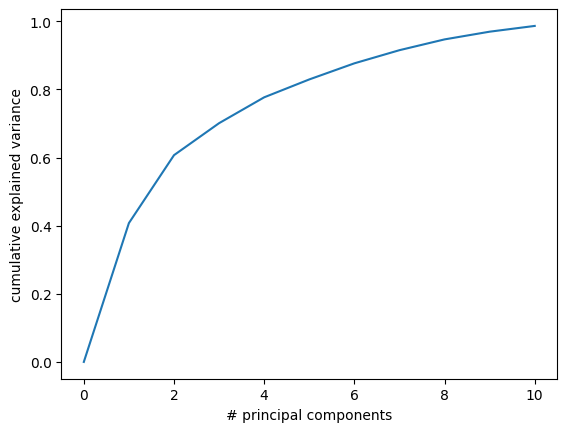

In [94]:
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_10d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

### <span style="color:#3498DB">Question: 主成份代表什麼含義？</span>

In [95]:
# 主成分分析其實就是在分析共變異數矩陣(covariance matrix)，矩陣的特徵向量(eigenvector)就是主成分，特徵值(eigenvalue)由大到小依序排列就是第一主成分、第二主成分...。
# 依照eigenvalue的大小排序共變異數矩陣的eigenvectors
pca = PCA(n_components=2, random_state=123)

# 注意我們是對標準化後的特徵做PCA
pca_trans = pca.fit_transform(Z_sk)

In [96]:
pip install jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.2}")

,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
第一主成分,0.43,0.28,0.19,0.14,-0.14,-0.32,-0.31,-0.33,-0.35,-0.34,-0.34
第二主成分,-0.072,0.43,0.56,0.5,0.32,0.24,0.21,-0.014,0.021,0.08,0.16


* 第一主成分：代表「魔力型英雄」。攻擊距離較長，魔力相關屬性較高，但其生命、物理能力及防禦相關數據較低。
* 第二主成分：代表「物理型英雄」。魔力相關屬性較低，但物理相關能力較高。

(np.float64(-4.434954006455199),
 np.float64(4.5683914101960665),
 np.float64(-5.47140009609917),
 np.float64(3.0040927479454886))

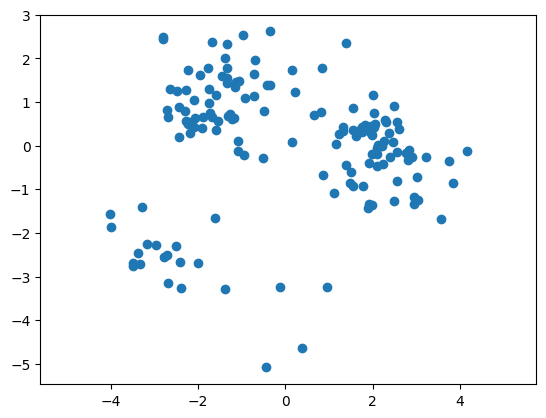

In [98]:
# 第一主成分顯示在 x 軸，第二主成分在 y 軸
plt.scatter(pca_trans[:, 0], pca_trans[:, 1])
plt.axis('equal')

### <span style="color:#3498DB">Point: 各類型在factors上的視覺化含義？</span>

In [99]:
factor_tb = pd.DataFrame(pca_trans, columns=['factor1', 'factor2'])

df_factor_tb = pd.concat([df.reset_index(drop=True), factor_tb], axis=1)
df_factor_tb

,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦,factor1,factor2
0,鬥士,-0.772997,-2.692574,-2.021736,-1.993567,0.222705,0.649856,-2.028602,1.152931,0.101648,1.186103,0.569248,-2.399782,-3.263599
1,法師,1.141695,0.942046,0.839349,-0.484533,0.524434,-0.801746,-0.057467,-0.837839,-1.036503,-1.367869,-0.664789,2.379953,0.286135
2,刺客,-1.028289,-0.953521,-2.021736,-1.993567,0.977028,0.515449,0.787304,1.152931,0.491872,-1.054223,3.448667,-3.288169,-1.410609
3,坦克,-1.028289,0.350768,0.839349,0.420887,2.636538,0.472438,1.068895,-0.837839,0.280501,2.082233,0.569248,-1.691015,2.374720
4,坦克,-1.028289,-0.197033,-0.233558,0.420887,-0.682483,1.539634,1.350486,-0.174249,-0.971466,0.439327,0.569248,-1.229717,0.614491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,刺客,-1.028289,-0.953521,-2.021736,-1.993567,-0.531618,0.757382,0.224123,1.152931,0.589427,0.289972,0.569248,-2.499096,-2.307431
143,法師,1.141695,1.481152,0.839349,-0.605256,0.524434,-0.532931,-0.057467,-1.501429,-0.841391,-1.278256,-0.664789,2.552894,0.542792
144,輔助,1.141695,1.237685,0.839349,-0.182727,-0.984212,-1.393139,-0.620649,-0.174249,-1.264133,-0.904868,-0.664789,2.778648,-0.161169
145,法師,1.141695,1.002913,0.481713,-0.484533,0.524434,0.112226,-0.057467,0.489341,-0.223538,-1.382805,-0.664789,1.318213,0.331709


In [100]:
df_factor_tb['類型'].unique()

array(['鬥士', '法師', '刺客', '坦克', '射手', '輔助'], dtype=object)

In [101]:
def recod_hero_type(ip_country):
    if ip_country == '鬥士':
        return 'Fighter'
    if ip_country == '法師':
        return 'Mage'
    if ip_country == '刺客':
        return 'Assassin'
    if ip_country == '坦克':
        return 'Tank' 
    if ip_country == '射手':
        return 'Archer'  
    if ip_country == '輔助':
        return 'Support' 
    else:
        return 'Others'

df_factor_tb['type'] = df_factor_tb['類型'].apply(recod_hero_type)

PCA visualization:


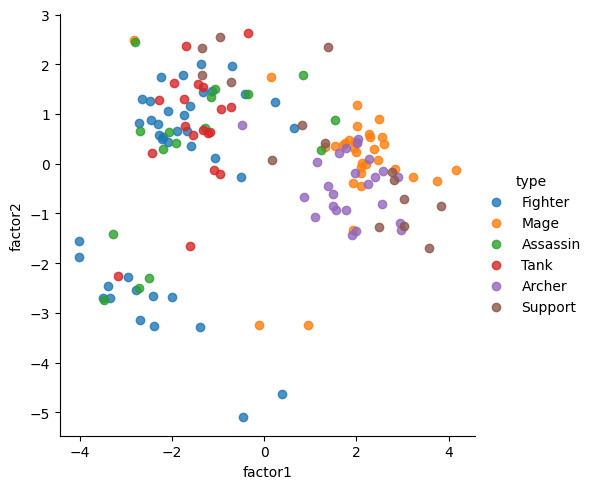

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

print('PCA visualization:')
sns.lmplot(data=df_factor_tb, x='factor1', y='factor2', hue='type', 
                   fit_reg=False, legend=True, legend_out=True)

* 射手(Archer)及法師(Mage)英雄普遍具有較大的x值，代表它們符合第一主成分的特性：遠程攻擊、魔法傷害高。
* 鬥士(Fighter)普遍擁有較小的x值。代表它們魔力較低但擁有相關較高的物理能力。

## 2.2 MDS

In [103]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
mds_trans = embedding.fit_transform(Z_sk)

In [104]:
mds_tb = pd.DataFrame(mds_trans, columns=['dim1', 'dim2'])

df_mds_tb = pd.concat([df.reset_index(drop=True), mds_tb], axis=1)
df_mds_tb

,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦,dim1,dim2
0,鬥士,-0.772997,-2.692574,-2.021736,-1.993567,0.222705,0.649856,-2.028602,1.152931,0.101648,1.186103,0.569248,4.139035,-2.874823
1,法師,1.141695,0.942046,0.839349,-0.484533,0.524434,-0.801746,-0.057467,-0.837839,-1.036503,-1.367869,-0.664789,-0.471850,2.885690
2,刺客,-1.028289,-0.953521,-2.021736,-1.993567,0.977028,0.515449,0.787304,1.152931,0.491872,-1.054223,3.448667,0.692676,-5.409958
3,坦克,-1.028289,0.350768,0.839349,0.420887,2.636538,0.472438,1.068895,-0.837839,0.280501,2.082233,0.569248,-3.834085,-1.485290
4,坦克,-1.028289,-0.197033,-0.233558,0.420887,-0.682483,1.539634,1.350486,-0.174249,-0.971466,0.439327,0.569248,-1.925120,-1.162183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,刺客,-1.028289,-0.953521,-2.021736,-1.993567,-0.531618,0.757382,0.224123,1.152931,0.589427,0.289972,0.569248,2.088080,-3.020375
143,法師,1.141695,1.481152,0.839349,-0.605256,0.524434,-0.532931,-0.057467,-1.501429,-0.841391,-1.278256,-0.664789,-0.600736,3.267256
144,輔助,1.141695,1.237685,0.839349,-0.182727,-0.984212,-1.393139,-0.620649,-0.174249,-1.264133,-0.904868,-0.664789,0.399432,3.272395
145,法師,1.141695,1.002913,0.481713,-0.484533,0.524434,0.112226,-0.057467,0.489341,-0.223538,-1.382805,-0.664789,-0.836000,1.748099


In [105]:
df_mds_tb['type'] = df_mds_tb['類型'].apply(recod_hero_type)

MDS visualization:


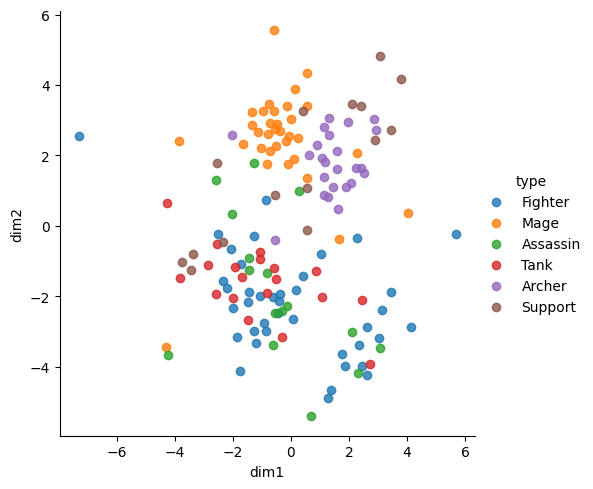

In [106]:
print('MDS visualization:')
sns.lmplot(data=df_mds_tb, x='dim1', y='dim2', hue='type', 
                   fit_reg=False, legend=True, legend_out=True)

### <span style="color:#3498DB">Question: 請比較PCA和MDS視覺效果化的結果？</span>